In [1]:
from Pipeline.Data_handler import load_game_data 

game_data = load_game_data()
# relavent columns: game_id, game_date, team_name_home, team_name_away, pts_home, pts_away, season_type

In [2]:
TEAMS = {'Portland Trail Blazers', 'Minnesota Timberwolves',
       'Washington Wizards', 'Sacramento Kings', 'Atlanta Hawks',
       'Orlando Magic', 'Chicago Bulls', 'San Antonio Spurs',
       'Cleveland Cavaliers', 'Seattle SuperSonics',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Milwaukee Bucks',
       'Golden State Warriors', 'Boston Celtics', 'Vancouver Grizzlies',
       'Phoenix Suns', 'Philadelphia 76ers', 'Dallas Mavericks',
       'Miami Heat', 'Houston Rockets', 'New York Knicks',
       'Toronto Raptors', 'Denver Nuggets', 'New Jersey Nets',
       'Charlotte Hornets', 'Utah Jazz', 'Detroit Pistons',
       'Indiana Pacers', 'Memphis Grizzlies', 'New Orleans Hornets',
       'Charlotte Bobcats',
       'Oklahoma City Thunder', 'New Orleans Pelicans', 'Brooklyn Nets',
       'LA Clippers'}

In [3]:
info =  game_data[["team_name_home", "team_name_away", "pts_home", "pts_away"]]
info_list = info.values.tolist()

In [4]:
from typing import List
from Glicko2.Game_record import Game_record
record_history : List[Game_record] = []
for record in info_list:
    team1, team2, team1_score, team2_score = record
    if team1 not in TEAMS or team2 not in TEAMS:
        print("Error", team1, "vs.", team2)
        continue
    record_history.append(Game_record(team1, team2, team1_score - team2_score))
    

In [5]:
from Glicko2.Glicko2_manager import Glicko2_manager

BLOCK_SIZE = 4
elo_system = Glicko2_manager()
elo_system.create_players_data(TEAMS)

elo_differences_score_differences = []
for i in range(len(record_history)//BLOCK_SIZE ):
    elo_system.appraise_players(record_history[i * BLOCK_SIZE : (i + 1) * BLOCK_SIZE ])
    
    
    if i > len(record_history)//BLOCK_SIZE  * .5:
        for j in range(BLOCK_SIZE ):
            game = record_history[i * BLOCK_SIZE + j]           
            p1 = game.player1
            p2 = game.player2
            p1_rating, p2_rating = elo_system.batch_get_rating([p1, p2])
            elo_differences_score_differences.append([p1_rating - p2_rating, game.player1_outcome])
    

In [6]:
X = list(map(lambda x: x[0], elo_differences_score_differences))
Y = list(map(lambda x: x[1], elo_differences_score_differences))

In [7]:
import numpy as np
from sklearn.metrics import r2_score

# Fit a first-degree polynomial (line) to the data
coefficients = np.polyfit(X, Y, 1)

# Get the slope (m) and y-intercept (b) from the coefficients
m = coefficients[0]
b = coefficients[1]

# Now you have the equation of the line: y = mx + b
print("Equation of the line: y =", m, "x +", b)

r_squared = r2_score(Y, m * np.array(X) + b)
print("R^2 score:", r_squared)

Equation of the line: y = 0.10953736373963027 x + 2.1221988226231727
R^2 score: 0.22529965481122738


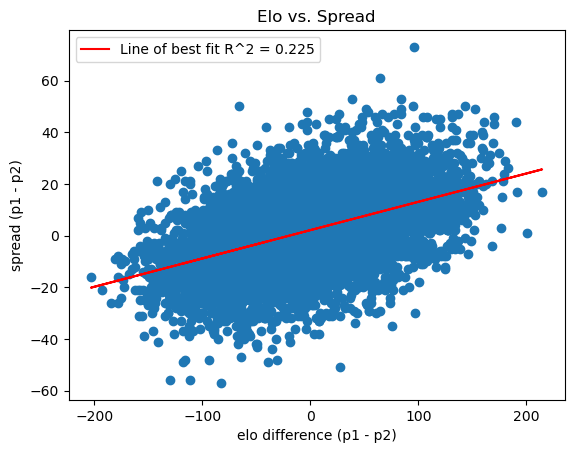

In [8]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1)
X = list(map(lambda x: x[0], elo_differences_score_differences))
Y = list(map(lambda x: x[1], elo_differences_score_differences))

plt.scatter(X, Y)
plt.plot(X, m * np.array(X) + b, color='red', label=f'Line of best fit R^2 = {"%.3f" % r_squared}')

r_squared = r2_score(Y, m * np.array(X) + b)

ax.set_ylabel("spread (p1 - p2)")
ax.set_xlabel("elo difference (p1 - p2)")
ax.set_title("Elo vs. Spread")

plt.legend()
plt.show()


In [9]:
from sklearn.metrics import r2_score

# Assuming y_true and y_pred are your true and predicted values respectively
r_squared = r2_score(Y, m * np.array(X) + b)

print("R^2 score:", r_squared)

R^2 score: 0.22529965481122738


In [10]:
# game_id, game_date, team_name_home, team_name_away, pts_home, pts_away, season_type


In [11]:
sorted([[x, elo_system.batch_get_rating([x])[0]] for x in TEAMS], key=lambda x: x[1], reverse=True)

[['Los Angeles Clippers', 1575.9937926826863],
 ['Boston Celtics', 1569.954494265739],
 ['Philadelphia 76ers', 1549.7788441877992],
 ['Cleveland Cavaliers', 1549.5127238391233],
 ['Milwaukee Bucks', 1548.9181587179407],
 ['Memphis Grizzlies', 1537.0862660860614],
 ['Golden State Warriors', 1535.4279477213722],
 ['New York Knicks', 1531.1216628700608],
 ['Phoenix Suns', 1529.9364232527698],
 ['Denver Nuggets', 1527.8538708708797],
 ['Toronto Raptors', 1522.6578242274045],
 ['Los Angeles Lakers', 1520.4746694436776],
 ['LA Clippers', 1518.2457555536369],
 ['Chicago Bulls', 1513.8115855273804],
 ['New Orleans Pelicans', 1513.6803381974687],
 ['Sacramento Kings', 1512.353426468406],
 ['Atlanta Hawks', 1510.702342684731],
 ['Brooklyn Nets', 1507.8793285054362],
 ['Minnesota Timberwolves', 1506.6960202587345],
 ['Miami Heat', 1506.2317312893217],
 ['Charlotte Bobcats', 1500.9488852951283],
 ['Vancouver Grizzlies', 1500],
 ['Seattle SuperSonics', 1500],
 ['Oklahoma City Thunder', 1499.5939042

In [1]:
x ={1:2, 3:4}


In [2]:
list(x.keys())

[1, 3]

In [9]:
x = (game_data["pts_home"] - game_data["pts_away"]).values

In [10]:
from sklearn.metrics import mean_squared_error

# Example usage:
mse = mean_squared_error(x, [0 for i in range(len(x))])
print("Mean Squared Error:", mse)

Mean Squared Error: 196.1377030950763


Cross validation [1/49]: MSE 194.07447186558176
Cross validation [2/49]: MSE 179.22345255084497
Cross validation [3/49]: MSE 213.75131816889592
Cross validation [4/49]: MSE 144.99986958773255
Cross validation [5/49]: MSE 152.82882548510656
Cross validation [6/49]: MSE 137.42110404426123
Cross validation [7/49]: MSE 167.16796149322545
Cross validation [8/49]: MSE 168.53090895688672
Cross validation [9/49]: MSE 161.799578034058
Cross validation [10/49]: MSE 180.7900616494763
Cross validation [11/49]: MSE 120.37823617660301
Cross validation [12/49]: MSE 160.9532897165442
Cross validation [13/49]: MSE 137.49894125848988
Cross validation [14/49]: MSE 180.8477537194548
Cross validation [15/49]: MSE 202.48965936638783
Cross validation [16/49]: MSE 136.8602307850729
Cross validation [17/49]: MSE 100.77589395069282
Cross validation [18/49]: MSE 155.0134670846113
Cross validation [19/49]: MSE 142.40665390444548
Cross validation [20/49]: MSE 208.659051692643
Cross validation [21/49]: MSE 133.4244

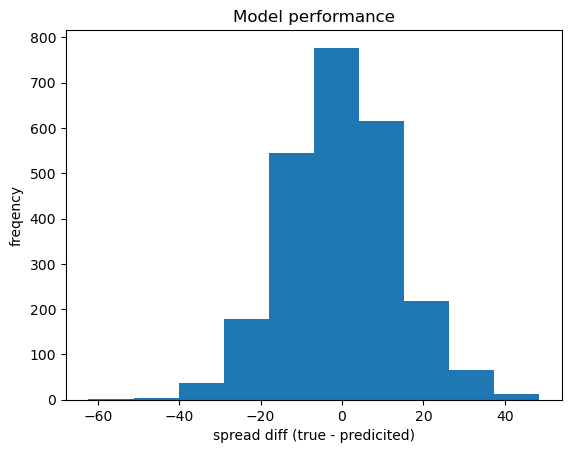

In [1]:
run main   

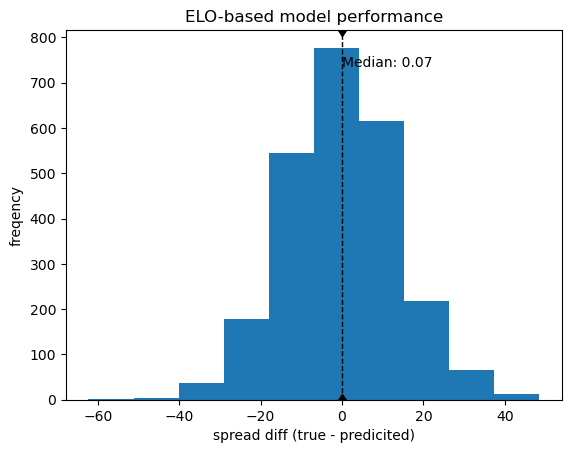

In [5]:
diff_spread = [y - x for x, y in zip(predicted_spread, true_spread)]
fig, ax = plt.subplots(1, 1)
plt.hist(diff_spread)

min_ylim, max_ylim = plt.ylim()
min_xlim, max_xlim = plt.xlim()

ax.set_xlabel("spread diff (true - predicited)")
ax.set_ylabel("freqency")
ax.set_title("ELO-based model performance")

median = sorted(diff_spread)[len(diff_spread)//2]
plt.axvline(median, color='black', linestyle='dashed', linewidth=1, marker="d", )
plt.text(median*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(median))


plt.show()

In [ ]:
fig,ax = plt.subplots(1,1)
sns.violinplot(data = df, density_norm="area", ax=ax)
ax.set_ylabel("time (ms)")
ax.set_title("Total GC Runtime Distribution on ServiceNow servers")

min_ylim, max_ylim = plt.ylim()
min_xlim, max_xlim = plt.xlim()
ax.set_ylim([min_ylim, df["glibc"].median() + df["glibc"].std() * 3])
plt.axhline(df["glibc"].median(), color='blue', linestyle='dashed', linewidth=1, marker="d", )
# plt.text(median*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(median))
# plt.text(max_xlim * 0.1, df["glibc"].median() * .975, 'Median: {:.2f}'.format(df["glibc"].median()), color = "blue")


plt.axhline(df["jemalloc"].median(), color='orange', linestyle='dashed', linewidth=1, marker="d")
# plt.text(max_xlim * 0.1, df["jemalloc"].median() * 1.02, 'Median: {:.2f}'.format(df["jemalloc"].median()), color = "orange")

plt.savefig("different_performance", type="png")

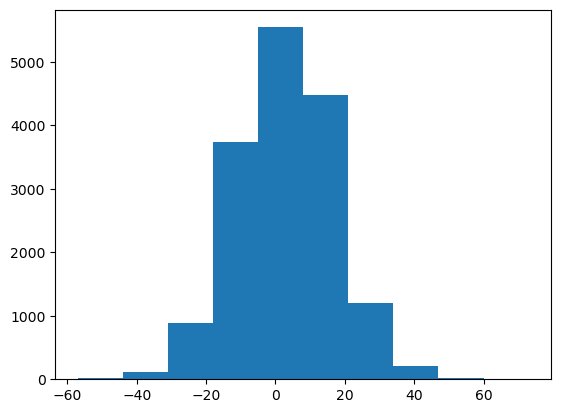

In [9]:
plt.hist(game_data["pts_home"] - game_data["pts_away"])
plt.show()